<a name="1common."></a>
## Содержание:
* [1. Описание проекта, описание данных, загрузка и импорт библиотек](#1.)
     - [1.1. Подготовка данных](#1.1.)
* [2. Исследовательский анализ данных](#2.)
     - [2.1. Период жизни](#2.1.)
     - [2.2. Топ - 5 платформ](#2.2.)
     - [2.3. Зависимость продаж от рейтинга](#2.3.)
     - [2.4. Портрет пользователя в каждом регионе](#2.4.)
* [3. Проверка гипотез](#3.)
* [4. Общий вывод](#4.)

 <a name="1."><a/><br/>
    <font size ="5"><b>1. Описание проекта, описание данных, загрузка и импорт библиотек</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [57]:
#для работа с таблицами
import pandas as pd

#для математики
import numpy as np

#для графиков
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
import pylab

#для проверки гипотез
from scipy import stats as st
import scipy as sp#статистика
import scipy.stats

In [13]:
df = pd.read_csv('C:/Users/User/Desktop/Python/Практикум/df_games123.csv')

#приведем столбцы к нижнему регистру
df.columns = map(str.lower, df.columns)
df.head()

,unnamed: 0,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [14]:
#фунция для поиска пропусков и их количества от общего числа данных
def missing_table(df):
        # Сумма пропущенных значений
        mis_val = df.isnull().sum()
        # Процент пропусков
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        # Таблица с реультатами
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Переменуем столбцы
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : "Пропуски", 1 : "% от общего"})
        # Отсортируем проценты по убыванию
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns['Пропуски'] != 0].sort_values(
        "% от общего", ascending=False).round(1)
        # Выведем инфу на экран
        print ("Данная таблица имеет " + str(df.shape[1]) + " столбцов.\n"      
            "В ней " + str(mis_val_table_ren_columns.shape[0]) +
              " столбцов с пропусками.")
        # Вернем полученную таблицу
        return mis_val_table_ren_columns
missing_table(df)

Данная таблица имеет 12 столбцов.
В ней 6 столбцов с пропусками.


,Пропуски,% от общего
critic_score,8578,51.3
rating,6766,40.5
user_score,6701,40.1
year_of_release,269,1.6
name,2,0.0
genre,2,0.0


<a name="1.1."><a/><br/>
    <font size ="4"><b>1.1.Подготовка данных</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

В столбце user_score встречается рейтинг 'tbd'. В английских сокращениях это значит To Be Determined, то есть "Будет определено". Значит рейтинга так же нет

In [17]:
#проверим их количество
len(df.query('user_score == "tbd"'))#

2424

In [19]:
#заменим на NaN Для прощения работы
df['user_score'] = df['user_score'].replace("tbd", "NaN")

Будм заменять пропущенные значения в столбцах 'year_of_release', 'critic_score', 'user_score'
1. 'year_of_release' - сгруппируем данные по платформе и найдем медианой значения. Заменим пропущенные значения в годах в соответствии с платформой.
2. 'critic_score' - заменим на медианный значения сгрупированные по жанрам
3. 'user_score' - заменим на медианный значения сгрупированные по жанрам

**Для замены будем использовать dict и map()**

In [22]:
#заменим пропуски в годах и приведем к удобноvу виду
dict_year = df.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = 'median').to_dict('dict')
df['year'] = df['platform'].map(dict_year['year_of_release'])
df['year_of_release'] = df['year_of_release'].fillna(df['year']).astype(int)

#во float
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

#заменим пропуски в критиках
dict_critic = df.pivot_table(index = 'genre', values = ['critic_score'], aggfunc = 'median').to_dict('dict')
df['cr'] = df['genre'].map(dict_critic['critic_score'])
df['critic_score'] = df['critic_score'].fillna(df['cr'])

#заменим пропуски в оценке пользователей
dict_user = df.pivot_table(index = 'genre', values = ['user_score'], aggfunc = 'median').to_dict('dict')
df['us'] = df['genre'].map(dict_user['user_score'])
df['user_score'] = df['user_score'].fillna(df['us'])

#удалим ненужные столбцы
columns = ['year', 'cr', 'us']
df.drop(columns, inplace=True, axis=1)

In [23]:
#проверка
df.isnull().sum()

unnamed: 0            0
name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          2
user_score            2
rating             6766
dtype: int64

In [24]:
#считаем общую выручку
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

 <a name="2."><a/><br/>
    <font size ="5"><b>2. Исследовательский анализ данных</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229A713B668>]],
      dtype=object)

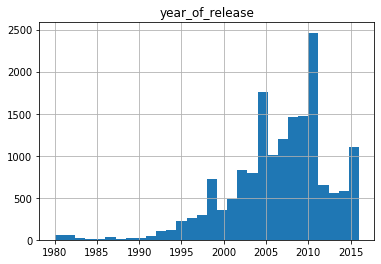

In [25]:
#посмотрели данные по количесвту игор за все года
df.hist('year_of_release', bins = 30)

In [31]:
top_plt = (df.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = 'sum')
    .sort_values(by = 'sum_sales', ascending = False)
    .head(10)
)
#определим самые популярные платформы
top_plt

,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


**Вывод**

Видно что данные с 1980 - 1994 не очень важны, так как игр выпускалось очень мало, да и вообще игровая индустрия только делала первые шаги. Наблюдаем всплески выхода игр 2005, 2010, 2015

<a name="2.1."><a/><br/>
    <font size ="4"><b>2.1.Период жизни</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Text(0.5, 1.0, 'Распределение продаж по годам и платформам')

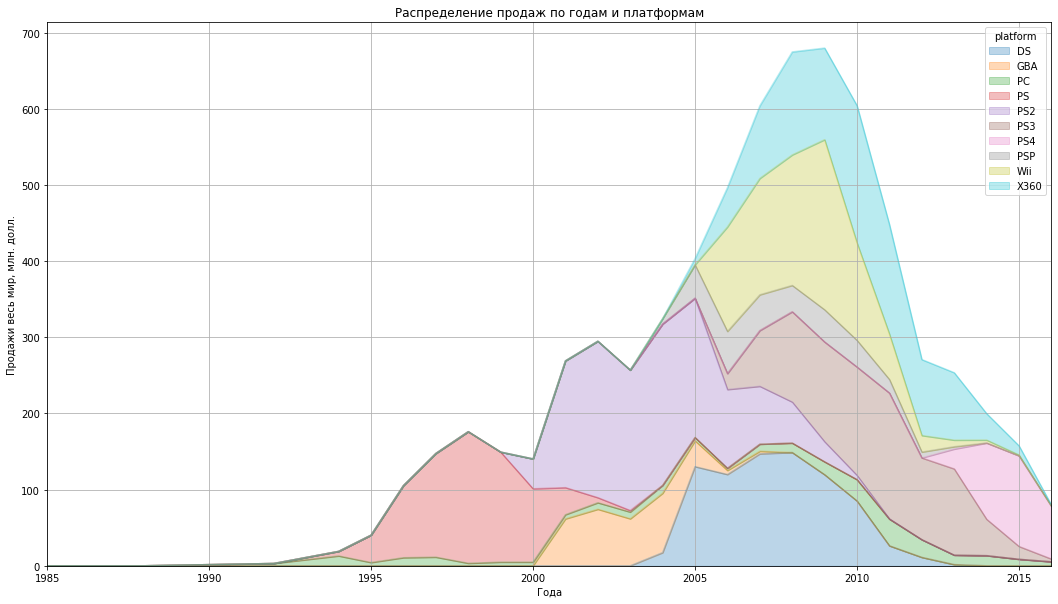

In [28]:
data = df.query('platform in @top_plt.index')
data1 = data.pivot_table(index='year_of_release', values='sum_sales', columns='platform', aggfunc = 'sum')
data1.plot.area(grid=True, figsize=(18, 10), alpha = 0.3)
plt.xlabel('Года')
plt.ylabel('Продажи весь мир, млн. долл.')
plt.title('Распределение продаж по годам и платформам')

**Вывод**

Можно сделать выод ,что средний срок жизни платформы 10 лет. Через 5 лет она на пике попупулярности, следующие 5 лет устаревание и появление на рынке более новых моделей. 

**Актуальный период** 2014-2016 год, последние 5 лет спад продаж у лидеров рынков. Значит на рынок выходят новые модели. PS4 и XOne например

<a name="2.2."><a/><br/>
    <font size ="4"><b>2.2.Топ - 5 платформ</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

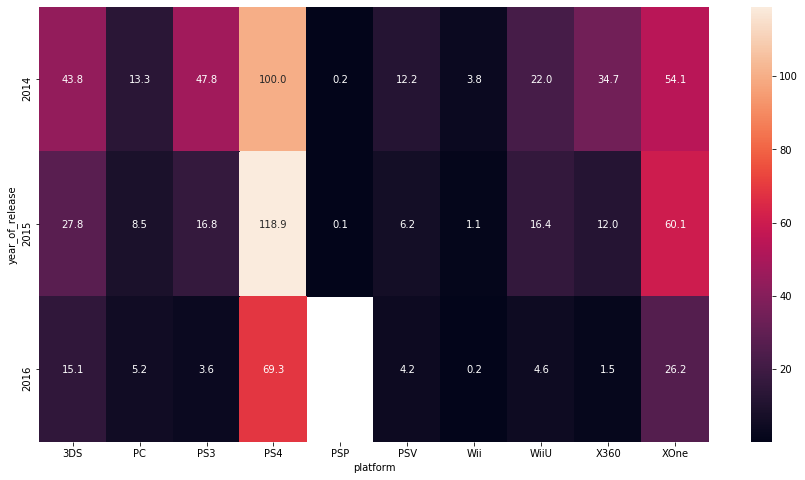

In [105]:
new_df = df.query('year_of_release >= 2014')
new_df1 = new_df.pivot_table(index='year_of_release', values='sum_sales', columns='platform', aggfunc = 'sum')
plt.figure(figsize=(15,8))
sns.heatmap(new_df1, annot=True, fmt=".1f")

In [32]:
(
new_df.pivot_table(index='platform', values='sum_sales', aggfunc = 'sum')
    .sort_values(by = 'sum_sales', ascending = False)
)

,sum_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.66
Wii,5.07


##### Выбираем 5 потенциальных платформы (**XOne,PS4, 3DS, PC, PS3**)

Продажи падают по всем платформам, но лидиры рынка удерживают свои позиции лидеров.PC выбрали, из-за хорошего потенциала роста

,sum_sales
platform,
3DS,0.41
PC,0.18
PS3,0.31
PS4,0.77
XOne,0.62


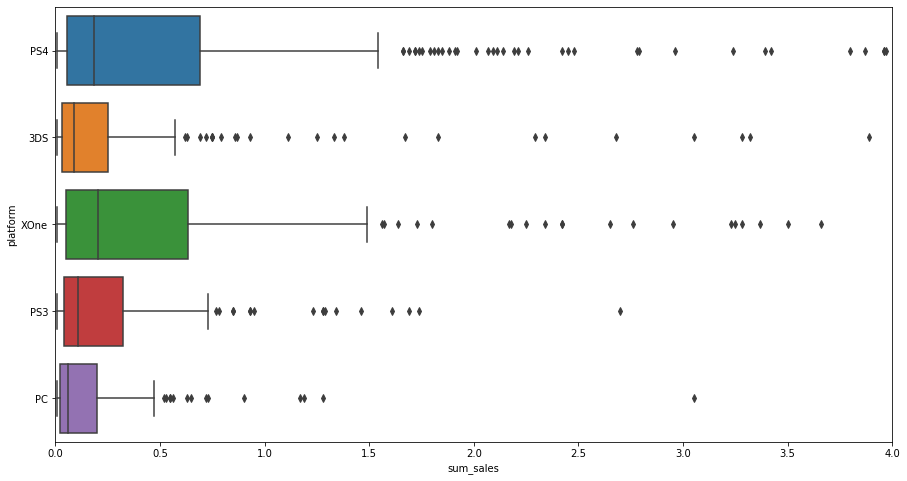

In [38]:
top_platform = new_df.query('platform == ["PC","PS4","XOne","3DS", "PS3"]')
plt.figure(figsize=(15,8))
plt.xlim([0,4])
sns.boxplot(x='sum_sales', y='platform', data=top_platform, orient='h')
top_platform.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = 'mean').round(2)

**Вывод**

По диаграмме размаха и по средним можно сказать, что продажи по разным платформам отличаются. Лучше всего продажи на самых популярных PS4 и XOne

<a name="2.3."><a/><br/>
    <font size ="4"><b>2.3.Зависимость продаж от рейтинга</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [40]:
top_PS4 = top_platform.query('platform == "PS4"')

#создаем 3d матрицу
fig1 = go.Scatter3d(x=top_PS4['critic_score'],
                    y=top_PS4['user_score'],
                    z=top_PS4['sum_sales'],
                    marker=dict( opacity=0.8,
                                reversescale=True,
                                colorscale= 'Viridis',
                                size=3),
                    line=dict (width=0.02),
                    mode='markers')
mylayout = go.Layout(title = 'Зависимость продаж игр PS4 от оценок пользователей и критиков',
                    scene=dict(xaxis=dict(title="Критики"),#карта для отображения
                                yaxis=dict(title="Пользователи"),
                                zaxis=dict(title="Продажи")),)

#подключаем мод для отображения в notebook
plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    "data": [fig1], 
    "layout": mylayout
 })

**Вывод**

По диаграмме рассеивания можно сказать, что сильно зависимости между 3 показателями нету. Но у игр с большими продажами рейтинг пользователей и критиков высокий. 

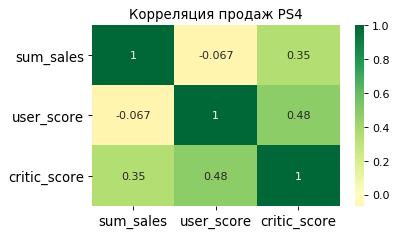

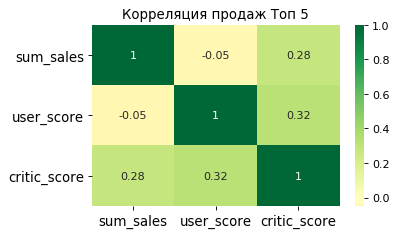

In [43]:
#построим коррялиационную тепловую карту на 1 место по продажам и ТОП -5
data_corr = top_PS4[['sum_sales', 'user_score', 'critic_score']]
plt.figure(figsize=(5,3), dpi= 80)
sns.heatmap(data_corr.corr(), xticklabels=data_corr.corr().columns, yticklabels=data_corr.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляция продаж PS4', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
data_corr1 = top_platform[['sum_sales', 'user_score', 'critic_score']]
plt.figure(figsize=(5,3), dpi= 80)
sns.heatmap(data_corr1.corr(), xticklabels=data_corr1.corr().columns, yticklabels=data_corr1.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляция продаж Топ 5', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Вывод**

Оценки пользователей практически не влияют на продажи. Оценки критиков имеют слабую положительную взаимосвязь с продажами и с оценками пользователей. 

In [44]:
#распределение выручки по жанрам
(
top_platform.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'sum')
.sort_values(by = 'sum_sales', ascending = False)
)

,sum_sales
genre,
Action,168.18
Shooter,151.81
Sports,93.41
Role-Playing,91.06
Misc,25.10
Fighting,20.99
Racing,18.69
Adventure,12.96
Simulation,12.67


**Вывод**

Можно сказать, что выделяются игры 4 жанкров Action, Shooter, Role-Playing, Sports. У остальных жанров продажи гораздо ниже. 

Puzzle продажи, оставляют желать лучшего, но на создание игры в жанре puzzle уходит куда меньше средств, чем на action, например. Стоит обратить на это внимание

<a name="2.4."><a/><br/>
    <font size ="4"><b>2.4.Портрет пользователя в каждом регионе</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Text(0.5, 1.0, 'Популярность по продажам в 3 областях')

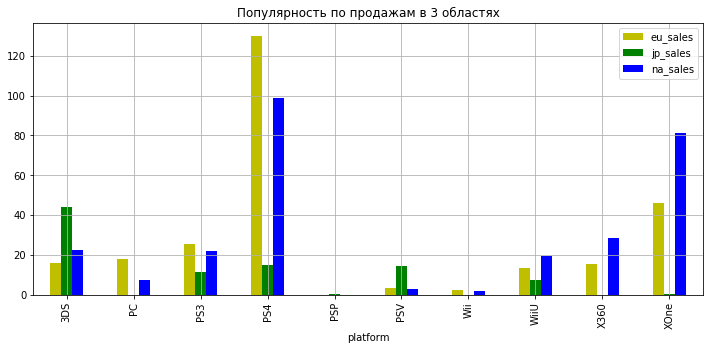

In [45]:
(
new_df.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
    .plot(grid=True, figsize=(12, 5),kind = 'bar',color=['y', 'g', 'b'])
)
plt.title("Популярность по продажам в 3 областях")

**Вывод**

Из графика можно выделить топ 5 популярных платформ. В Европе и Америке они практически не отличаются, а вот в Японии лидирует 3DS и PSV. Местные поддерживают отечественного производителя играя в Sony и Nintendo. 

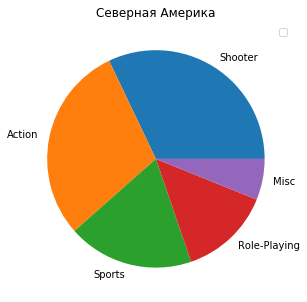

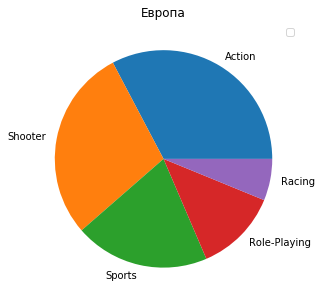

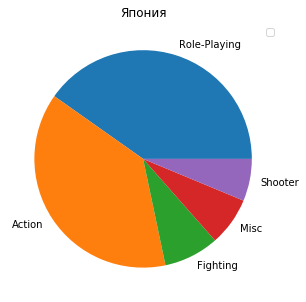

In [46]:
(
new_df.pivot_table(index='genre', values='na_sales', aggfunc = 'sum')
    .sort_values(by = 'na_sales', ascending = False)
    .head(5)
    .plot.pie(grid=True, figsize=(12, 5), subplots=True),
)
plt.title("Северная Америка")
plt.ylabel("")
plt.legend("")
(
new_df.pivot_table(index='genre', values='eu_sales', aggfunc = 'sum')
    .sort_values(by = 'eu_sales', ascending = False)
    .head(5)
    .plot.pie(grid=True, figsize=(12, 5), subplots=True)
)
plt.title("Европа")
plt.ylabel("")
plt.legend("")
(
new_df.pivot_table(index='genre', values='jp_sales', aggfunc = 'sum')
    .sort_values(by = 'jp_sales', ascending = False)
    .head(5)
    .plot.pie(grid=True, figsize=(12, 5), subplots=True)
)
plt.title("Япония")
plt.ylabel("")
plt.legend("")

**Вывод**

Различия по жанрам тоже существенны. Америка и Европа любят стрелялки и спортивные симуляторы, когда как Япония предпочитает RPG и Экшн

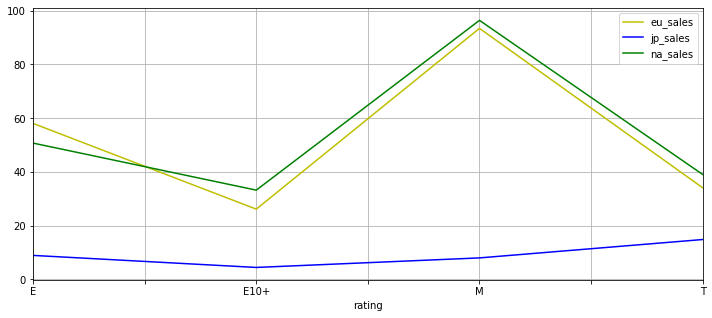

In [48]:
(
new_df.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
    .plot(grid=True, figsize=(12, 5), color = ['y', 'b', 'g'])
)

**Вывод**

В Америке и Евроме лидирует рейтинг M, когда как в Японии рейтинг практически не влияет на продажи

 <a name="3."><a/><br/>
    <font size ="5"><b>3. Проверка гипотез</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Выдвигаем гипотезу, что средние пользовательских рейтингов платформы PC и XOne равны:
    
    Нулевая - равны
    Альтернетивная - различны

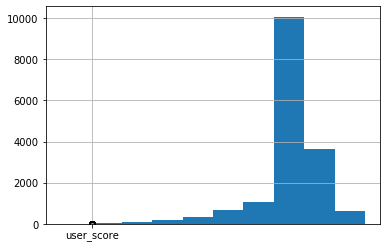

In [93]:
#проверим распределение наших данных
df['user_score'].hist()

(5, 9)

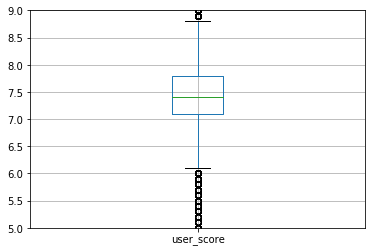

In [95]:
#взглянем на выбросы
df.boxplot('user_score')
plt.ylim(5, 9)

### Вывод

Очень много выбросов ниже 6 и выше 9 баллов, они исказать наши данные, удалим их

In [54]:
#функция для расчета стандартной ошибки
def stde(data, confidence):
    arr = np.array(data)
    se = scipy.stats.sem(arr)
    he = se * (1+confidence)
    return he

In [55]:
#функция для определение дов.интервалов
def dov_int(data, confidence):
    arr = np.array(data)
    n = len(arr)
    m, se = np.mean(arr), scipy.stats.sem(arr)
    h = stde(data, confidence)
    print('mean =', m.round(1), 'down =',(m-h).round(1), 'up =',(m+h).round(1), 'stde =',h.round(1))

In [83]:
#функция для проведения теста Стьюдента
def st_tt(array1, array2):
    alpha = 0.05
    results = st.ttest_ind(
    array1, 
    array2)
    if (results.pvalue < alpha):
        print('Отклоняем нулевую гипотезу')
    else:
        print('Не получилось отклонить нулевую гипотезу')
    print('p-value =', results.pvalue)
    print('Доверительные интервалы')
    print('Группа а')
    dov_int(array1, 0.95)
    print('Группа b')
    dov_int(array2, 0.95)

In [99]:
#проверим различия между платформами "PC" и "XOne"
a = df.query('platform == "PC" & user_score > 5 & user_score < 9')['user_score']
b = df.query('platform == "XOne" & user_score > 5 & user_score > 5')['user_score']
st_tt(a, b)

Отклоняем нулевую гипотезу
p-value = 4.241060846429663e-11
Доверительные интервалы
Группа а
mean = 7.5 down = 7.4 up = 7.5 stde = 0.1
Группа b
mean = 7.0 down = 6.9 up = 7.1 stde = 0.1


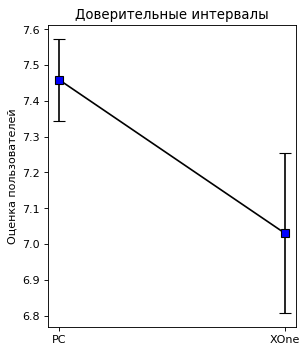

In [103]:
value = (a.mean(), b.mean())
label = ('PC', 'XOne')
stde1, stde2 = stde(a, 0.95),stde(b, 0.95)
y_pos = np.arange(len(label))
plt.figure(figsize=(4,5), dpi= 80)
plt.errorbar(y_pos, value, yerr =(2*stde1, 2*stde2), color="black", capsize=5,
             marker="s", markersize=7, mfc="blue", mec="black")
plt.xticks(y_pos, label)
plt.ylabel('Оценка пользователей')
plt.title('Доверительные интервалы')
plt.show()

In [101]:
#проверим различия между жанрами "Action" и "Sports"
c = new_df.query('genre == "Action" & user_score > 5 & user_score < 9')['user_score']
d = new_df.query('genre == "Sports" & user_score > 5 & user_score < 9')['user_score']
st_tt(c, d)

Отклоняем нулевую гипотезу
p-value = 7.801312968693395e-12
Доверительные интервалы
Группа а
mean = 7.3 down = 7.2 up = 7.3 stde = 0.0
Группа b
mean = 6.8 down = 6.6 up = 7.0 stde = 0.2


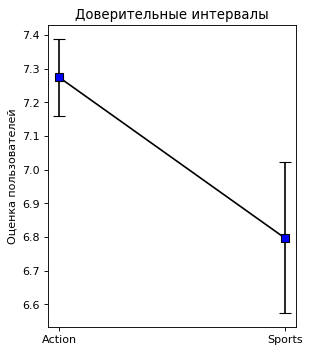

In [104]:
value = (c.mean(), d.mean())
label = ('Action', 'Sports')
stde1, stde2 = stde(a, 0.95),stde(b, 0.95)
y_pos = np.arange(len(label))
plt.figure(figsize=(4,5), dpi= 80)
plt.errorbar(y_pos, value, yerr =(2*stde1, 2*stde2), color="black", capsize=5,
             marker="s", markersize=7, mfc="blue", mec="black")
plt.xticks(y_pos, label)
plt.ylabel('Оценка пользователей')
plt.title('Доверительные интервалы')
plt.show()

 <a name="4."><a/><br/>
    <font size ="5"><b>4. Общий вывод</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Для оценки потенциального спроса на игру в 3 частях света мы используем метрики:
1. Жанр
2. Платформа
3. Рейтинг ESRB
4. Рейтинг критиков

Предположения сделанны на основе данных по продажам за прошлые года. В список признаков попали лидеры по продажам. Мы получили портрет идеальной игры по 4-признакам.

**Северная Америка и Европа:**
1. Action, Shooter, Sports
2. PS4, XOne, 3DS
3. Ретинг M
4. Высокий

**Япония:**
1. Action, RPG
2. 3DS, PS4, PSV
3. Любой рейтинг
4. Высокий

Игры попадающие в эти метрики будут пользоваться хорошим спросом

Прверка статистических гипотез показала, что оценки пользователей по платформам PC и XOne, и жанрам Action и Sports имеют статистически значимые различия. Доверительные интервалы не пересекаються. 